# (99942) Apophis propagation test

#### Let's start by importing the necessary libraries

In [ ]:
from grss import prop, utils

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=40, linewidth=np.inf)

#### We'll then define the initial barycentric equatorial Cartesian state of the asteroid plus any nongravitational accelerations acting on it.

In [3]:
t0 = 62130.0
pos = [-0.4430312741660833, 0.8965062452933791, 0.3218771965080118]
vel = [-0.0148212842112486, -0.0042500259738234, -0.0019519585329488]
ng_params = prop.NongravParameters()
ng_params.a1 = 5E-13
ng_params.a2 = -2.901085583204654E-14
ng_params.a3 = 0.0
ng_params.alpha = 1.0
ng_params.k = 0.0
ng_params.m = 2.0
ng_params.n = 0.0
ng_params.r0_au = 1.0
apophis = prop.IntegBody("(99942) Apophis", t0, 0.0, 0.0, pos, vel, ng_params)

#### Let's choose the planetary kernels, final time, and initialize the simulation.

In [4]:
de_kernel = 440
de_kernel_path = utils.default_kernel_path
tf = 62495.0
prop_sim = prop.PropSimulation("(99942) Apophis propagation test", t0, de_kernel, de_kernel_path)

#### We need to define the times at which we want to retrieve the state of the asteroid, plus some choices for the evaluated states:
- Whether we want to retrieve the geometric or apparent state of the asteroid.
- Whether the evaluation times are in the TDB or UTC time scale.
- Whether we want to use a converged light time solution if the apparent state is chosen.

In [5]:
t_temp = t0
t_eval = []
while t_temp <= tf:
    t_eval.append(t_temp)
    t_temp += 1.0

eval_apparent_state = False
t_eval_utc = False
converged_light_time = False
prop_sim.set_integration_parameters(tf, t_eval, t_eval_utc, eval_apparent_state, converged_light_time)

#### Finally, we add the asteroid to the simulation and propagate it.

In [6]:
prop_sim.add_integ_body(apophis)
prop_sim.integrate()

#### Plot the results

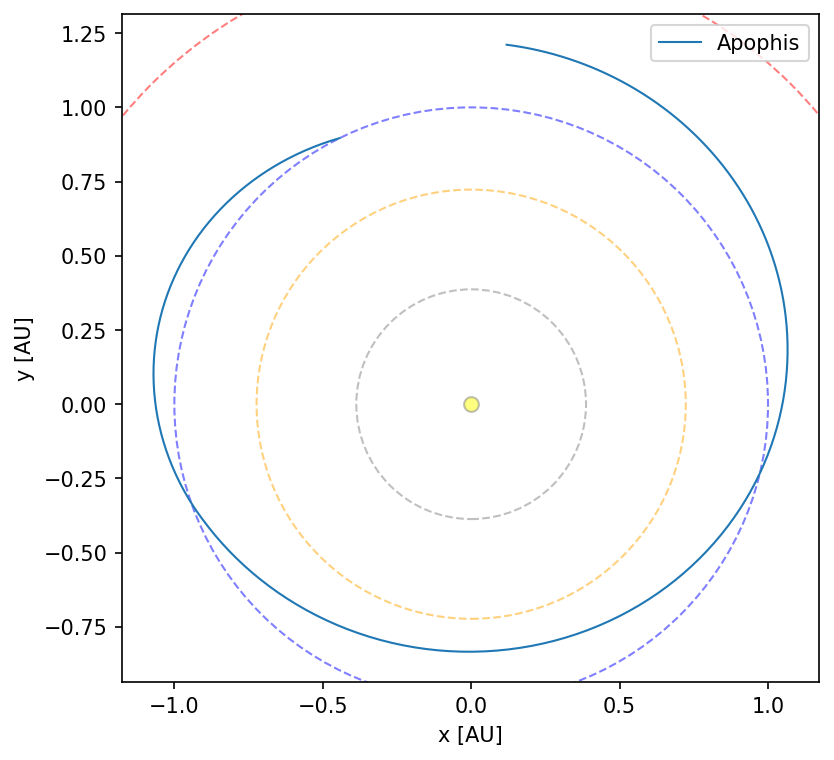

In [7]:
arr = np.array(prop_sim.xIntegEval)
# plot xy and xz projections of the orbit in a 2x1 subplot
plt.figure(figsize=(6, 6), dpi=150)
axs = plt.gca()
prop.plot_solar_system(axs, xy_plane=True, alpha=0.5)
axs.plot(arr[:,0], arr[:,1], '-', lw=1.0, label="Apophis")
axs.set_xlabel("x [AU]")
axs.set_ylabel("y [AU]")
axs.set_aspect('equal')
plt.legend()
plt.show(block=False)
plt.close()

#### Make sure the final state is correct

In [8]:
jpl = np.array([0.1194303822347949, 1.2110683438150556, 0.4767184664960469, -0.0134714830959050, 0.0017461826766498, 0.0004605752588853])
grss = np.array(prop_sim.xInteg)
pos_diff = np.linalg.norm((jpl-grss)[:3])*prop_sim.consts.du2m
assert pos_diff < 5.0e3, f"Position difference {pos_diff} m is too large"